Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.

In [33]:
#Функция качества хромосом 
def qZ(x,y):
    return (x - 3 * y) / (2* x**2 + 2 * y**2 + 1) #8 вариант
#Сумма качества хромосом
def qsumZ(Z):
    return sum(Z)
#обмен хромосомами
def exchangeScheme(oldX, oldY, sortedId): 
    X = [0 for i in range(4)] 
    Y = [0 for i in range(4)]
    print(oldX)
    X[2] = oldX[sortedId[2]] 
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]] 
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

#сортировка массива по качеству потомков
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])

    return sortedId

#Шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z)) 
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

#Шаги эволюции
def evoSteps(X, Y, stepsNum = 6): 
    results = []

    for i in range(stepsNum): 
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X,Y,Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qsumZ(arrZ), arrZ])

    return X, Y, results

#объявление массивов хромосом
X = [-5,-3,-2,-1] #8 вариант
Y = [-1,-2,0,1]

#реализация алгоритма
results = evoSteps(X,Y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = [] 
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
print(f'max Z: {max(qualityArrZ)}')

[-5, -3, -2]
[-2, -5, -3]
[-3, -2, -2]
[-2, -3, -2]
[-2, -2, -2]
[-2, -2, -2]
max_1_step: -0.948846960167715
max_2_step: 0.09434853334732646
max_3_step: 0.4542634722096337
max_4_step: 0.6726084373143197
max_5_step: 0.8169934640522876
max_6_step: 0.9411764705882353
max Z: 0.23529411764705882


Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже

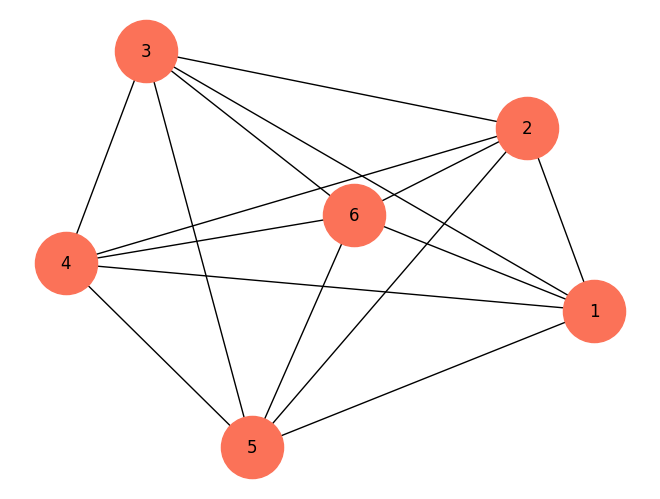

In [43]:
import networkx as nx 
from math import e

distances = [(1, 2,19),
            (1, 3, 39),
            (1, 4, 35),
            (1, 5, 26),
            (1, 6, 18),
            (2, 3,26),
            (2, 4, 33),
            (2, 5, 37),
            (2, 6, 14),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 22),
            (4, 6, 19),
            (5, 6, 24)] # длины рёбер
V = [1, 4, 2,3,5,6,1] # последовательность прохождения маршрута
Z = [(5,2),
    (4, 5),
    (2,3),
    (3,4)] # последовательность замен вершин 
P = [88,54,24,64] # случайные числа, быпавшие в процессе счёта
T = 100 # начальная температура

# функция бероятности
def probability(delta, T): 
    return 100 * e ** (-delta / T)

# функция изменения температуры 
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

graph = nx.Graph() # создание пустого графа 
graph.add_weighted_edges_from(distances) # добавление весов рёбер

# отрисовка графа с заданными бершинами 
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)



In [44]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True): 
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) 
                    for item in distances])
    else: 
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [45]:
# вычисление длины маршрута
def routeLength(V, distances): 
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
        
    return sum(edges)

In [46]:
# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

# перестановки в пути 
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

In [47]:
# быбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P): 
    sumLength = routeLength(V, distances) # нахождение длины numa
    arrSum = [sumLength] # массиб сумм длин

# циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый марирут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута 
        arrSum.append(newS) 
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница между длинати больше 0, то вычисляется вероятность 
        if deltaS > 0:
            p = probability(deltaS, T) # подсчет вероятности
            
            # если заданная вероятность попадает в интердал от в до р, то новый маршрут выбирается 
            if p > P[i]: 
                V = newV 
                sumLength = newS
        else: 
            V = newV 
            sumLength = newS
        T = reductTemp(T) # вычисление температуры
    
    return V, arrSum

Лучший выбранный маршрут: [1, 2, 5, 4, 3, 6, 1]
Длина лучшего выбранного маршрута: 139
Длины всех рассмотренных маршрутов: [177, 148, 157, 139, 154]


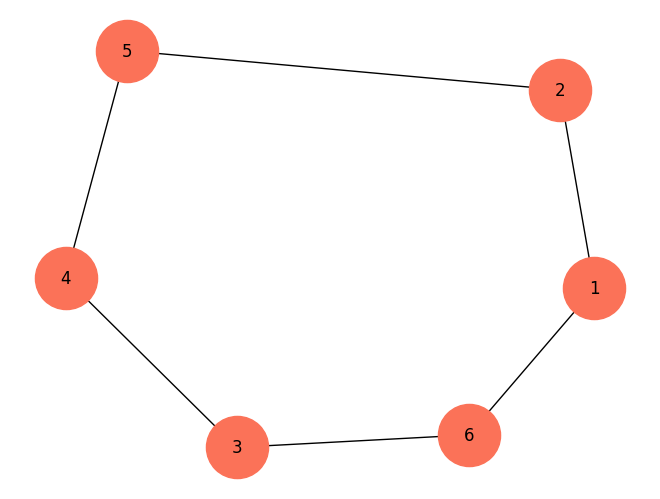

In [48]:
# отрсовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = [] 
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]: 
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добабление весоб ребер # отрисобка графа с заданными вершинами 
    #отрисовка графа с заданными вершинами 
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}') 
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}') 
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances,bestRoute)